# WEEK 9 TIDY DATA:

In [112]:
import pandas as pd
import  numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/jacoblgoodman/DAV-5400/master/week9/Data.csv', skip_blank_lines = True)
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seatle
0,Alaska,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Am west,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


# 1. Create a .CSV:

file created via excel

# 2a. Read in your data:

starting by answering the following questions(<mark>answers marked</mark>):

1. To get started, think about how you would want the data to appear if it were converted to “long” format, e.g., how would you define a “single observation” for the data shown in the graphic?;   


    <span style="color: red">A single observation for this data would be a a count of flights, from a airport by an airline by status</span>.

2. How many key values are associated with each data value?  

   **<span style="color: red"> this data set containts 4 variables:  </span>**  
    - <span style="color: red">   airline ('Alaska', 'AM west')  </span>  
    - <span style="color: red">  status ('ontime','delayed')</span>  
    - <span style="color: red"> airport('LA','PHO','SD','SF','SEA')</span>  


3. How many columns should your long format structure contain based on the information provided in the graphic shown above?

   <span style="color: red">based on the data their should be 4 columns 3 categorical variables ('airline','status','airport') and one numeric variable  ('number of flights')</span>.
4. What would the column headings for the long structure be?; 

   <span style="color: red">airline, status, airport, num_flights </span>.

# 2b tidying:

the following steps will be followed to clean the data TWO ways:

1. loading steps followed for both instances:
   1. utlizing read csv
   2. dropping  all NA values
   3. front filling to replace missing 
   4. renaming columns
2. tidying with stack method
   1. set multi-index (airlines, status)
   2. name columns (Airports)
   3. stack columns to index and cast values as int
3. tidying with melt:
   1. load new df and run step 1
   2. melt method with columns airline, status as id vars 

In [113]:
#1b 
df = df.dropna(how='all')
#1c
df = df.fillna(method='ffill')
#1d
df.rename(columns = {'Unnamed: 0': 'airline','Unnamed: 1':'status'}, inplace = True)
#inspect 
df

,airline,status,Los Angeles,Phoenix,San Diego,San Francisco,Seatle
0,Alaska,on time,497.0,221.0,212.0,503.0,1841.0
1,Alaska,delayed,62.0,12.0,20.0,102.0,305.0
3,Am west,on time,694.0,4840.0,383.0,320.0,201.0
4,Am west,delayed,117.0,415.0,65.0,129.0,61.0


In [114]:
#2a
df.set_index(['airline','status'], inplace=True)
#2b
df.columns.names = ['Airports']
#inspect
df

Airports         Los Angeles  Phoenix  San Diego  San Francisco  Seatle
airline status                                                         
Alaska  on time        497.0    221.0      212.0          503.0  1841.0
        delayed         62.0     12.0       20.0          102.0   305.0
Am west on time        694.0   4840.0      383.0          320.0   201.0
        delayed        117.0    415.0       65.0          129.0    61.0

In [115]:
#2c
tidy = df.stack().astype('int64')
tidy.name= 'num_flights'
tidy

airline  status   Airports     
Alaska   on time  Los Angeles       497
                  Phoenix           221
                  San Diego         212
                  San Francisco     503
                  Seatle           1841
         delayed  Los Angeles        62
                  Phoenix            12
                  San Diego          20
                  San Francisco     102
                  Seatle            305
Am west  on time  Los Angeles       694
                  Phoenix          4840
                  San Diego         383
                  San Francisco     320
                  Seatle            201
         delayed  Los Angeles       117
                  Phoenix           415
                  San Diego          65
                  San Francisco     129
                  Seatle             61
Name: num_flights, dtype: int64

In [116]:
#3a (1abcd)
df2 = pd.read_csv('https://raw.githubusercontent.com/jacoblgoodman/DAV-5400/master/week9/Data.csv', skip_blank_lines = True)
df2 = df2.dropna(how='all')
df2 = df2.fillna(method='ffill')
df2.rename(columns = {'Unnamed: 0': 'airline','Unnamed: 1':'status'}, inplace = True)
#3a
tidy2 =df2.melt(id_vars=['airline','status'])
#inspect
tidy2

,airline,status,variable,value
0,Alaska,on time,Los Angeles,497.0
1,Alaska,delayed,Los Angeles,62.0
2,Am west,on time,Los Angeles,694.0
3,Am west,delayed,Los Angeles,117.0
4,Alaska,on time,Phoenix,221.0
5,Alaska,delayed,Phoenix,12.0
6,Am west,on time,Phoenix,4840.0
7,Am west,delayed,Phoenix,415.0
8,Alaska,on time,San Diego,212.0
9,Alaska,delayed,San Diego,20.0


# 3. doing analysis

> Using your reshaped/transformed data, perform analysis to compare the arrival delays for the two airlines.  Some questions you might choose to answer: For each city, which airline had the best on time performance?; Which airline had the best overall on time performance?, etc.  

**Initial**:
1. which airline had the best on time performance per city
2. best on time performance per airline  
**extra**:
1. is on time performance correlated to total number of flights per airport

In [117]:
#1. airport_airline_otp (on time performance)
airport_airline_otp = tidy.unstack(1)
airport_airline_otp['otp'] = airport_airline_otp['on time']/(airport_airline_otp['delayed']+airport_airline_otp['on time'])
otp = airport_airline_otp.stack().loc[:,:,'otp'].unstack(0)

for index, row in otp.iterrows():
    if row['Alaska']> row['Am west']:
        otp.loc[index,'winner'] = 'Alaska'
    else:
        otp.loc[index,'winnder'] = 'Am west'
otp.winner

Airports
Los Angeles      Alaska
Phoenix          Alaska
San Diego        Alaska
San Francisco    Alaska
Seatle           Alaska
Name: winner, dtype: object

1. analysis:
Alaskan airlines has better onetime performance at all airports

In [118]:
# 2.  
airline_otp = tidy2.pivot_table(index = 'airline',columns='status',values='value', aggfunc=np.sum,margins = True, margins_name='total flights')

airline_otp['otp'] = airline_otp['on time']/airline_otp['total flights']

airline_otp.iloc[:,[1,-1]]

status,on time,otp
airline,,
Alaska,3274.0,0.867285
Am west,6438.0,0.891073
total flights,9712.0,0.882909


2. analysis:
Am west has better global on time performance (at least in this dataset) 

In [119]:
#3 anlysis of total number of flights per airline/airports relatioship to on time percentage

# create a data frame of OTP perctengage and total flight by airline airport
otp_total, otp_total['total']  = airport_airline_otp.loc[:,['otp']], airport_airline_otp.loc[:,'delayed']+airport_airline_otp.loc[:,'on time']

#sanity check
otp_total

status                      otp  total
airline Airports                      
Alaska  Los Angeles    0.889088    559
        Phoenix        0.948498    233
        San Diego      0.913793    232
        San Francisco  0.831405    605
        Seatle         0.857875   2146
Am west Los Angeles    0.855734    811
        Phoenix        0.921028   5255
        San Diego      0.854911    448
        San Francisco  0.712695    449
        Seatle         0.767176    262

status       otp     total
status                    
otp     1.000000  0.301707
total   0.301707  1.000000


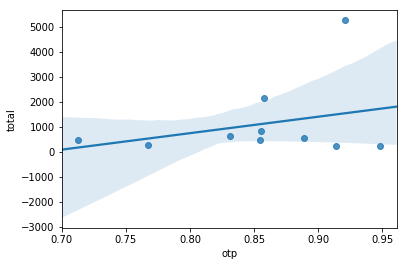

In [122]:
# plot 
ax = sns.regplot('otp','total',data=otp_total);
print(otp_total.corr())

3. analysis: their does not appear to be a strong correlation between the total number of flights or the on time percentage

# 4. untidying for presentation:

> Finally, given your “tidy” long format structure, consider what, if any, changes you would make to the visual presentation of the data if you were then asked to transform your “long” data back into a “wide” format: would you mimic the structure of the graphic shown above? If not, how might you transform your “long” data to “wide” format to make its “wide” presentation easier to understand and work with? Provide an example of your recommendation. 

for my `presentation` wide data frame I would add a total column by airline to help understand to help readers understand the total amount of flights per airline and airport. I would also utilize pandas indexes which would help move the data back in the future.

In [121]:
presentation = tidy.unstack().groupby(level=0).sum()
presentation['total'] ='total'
presentation = pd.concat([tidy.unstack(),presentation.set_index('total', append=True)]).sort_index()
presentation

Airports         Los Angeles  Phoenix  San Diego  San Francisco  Seatle
airline status                                                         
Alaska  delayed           62       12         20            102     305
        on time          497      221        212            503    1841
        total            559      233        232            605    2146
Am west delayed          117      415         65            129      61
        on time          694     4840        383            320     201
        total            811     5255        448            449     262